1️⃣ Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display options
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

2️⃣ Load Dataset

In [9]:
# Replace the path with your actual file path
df = pd.read_csv('zomato.csv')

df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [11]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


3️⃣ Data Cleaning

In [12]:
# Check for missing values
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [13]:
# Drop or fill as needed — example:
df = df.dropna(subset=['rate', 'approx_cost(for two people)'])

In [14]:
# Clean up 'rate' column if it's messy
df['rate'] = df['rate'].apply(lambda x: str(x).split('/')[0].strip() if '/' in str(x) else np.nan)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

In [15]:
# Clean up 'approx_cost' column
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').astype(float)

In [16]:
# Remove duplicates
df = df.drop_duplicates()

In [17]:
# Check again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43690 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          43690 non-null  object 
 1   address                      43690 non-null  object 
 2   name                         43690 non-null  object 
 3   online_order                 43690 non-null  object 
 4   book_table                   43690 non-null  object 
 5   rate                         41418 non-null  float64
 6   votes                        43690 non-null  int64  
 7   phone                        43099 non-null  object 
 8   location                     43690 non-null  object 
 9   rest_type                    43541 non-null  object 
 10  dish_liked                   23474 non-null  object 
 11  cuisines                     43682 non-null  object 
 12  approx_cost(for two people)  43690 non-null  float64
 13  reviews_list         

4️⃣ Cuisine Popularity

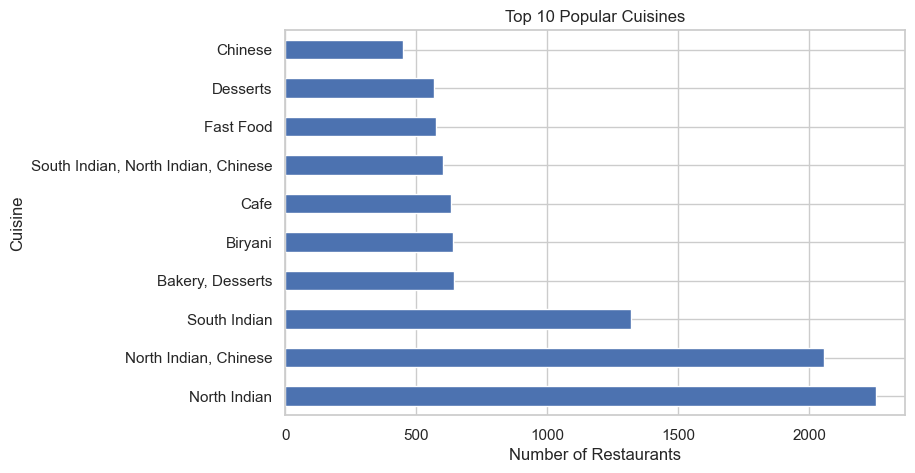

In [18]:
# Check 'cuisines' column
df['cuisines'].value_counts().head(10).plot(kind='barh', figsize=(8,5))
plt.title('Top 10 Popular Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()

5️⃣ Ratings Distribution

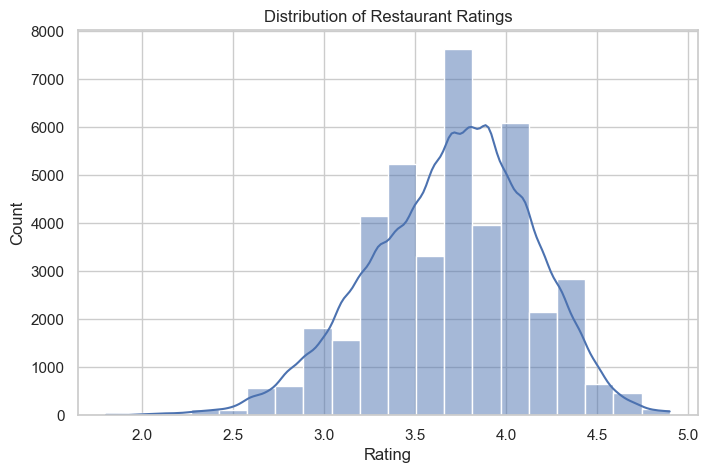

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['rate'].dropna(), bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


6️⃣ Pricing vs. Rating

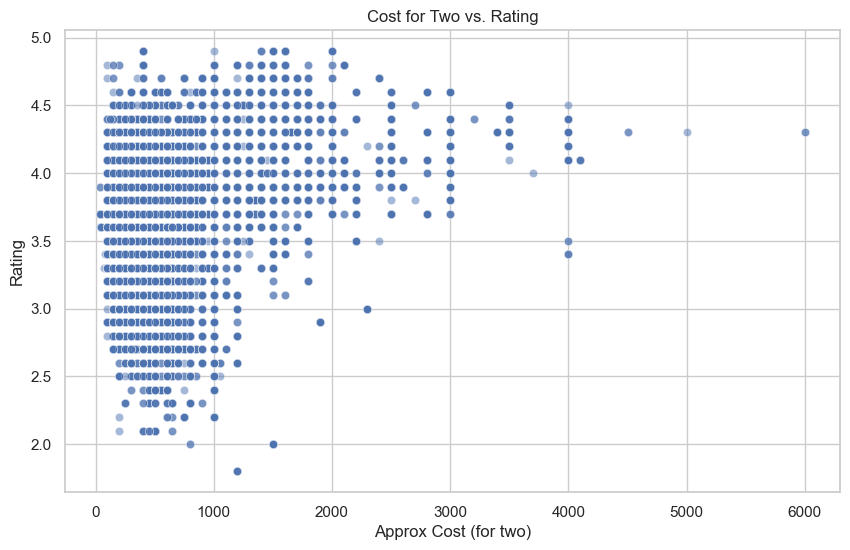

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='approx_cost(for two people)', y='rate', data=df, alpha=0.5)
plt.title('Cost for Two vs. Rating')
plt.xlabel('Approx Cost (for two)')
plt.ylabel('Rating')
plt.show()


7️⃣ Delivery Hotspots (Optional)

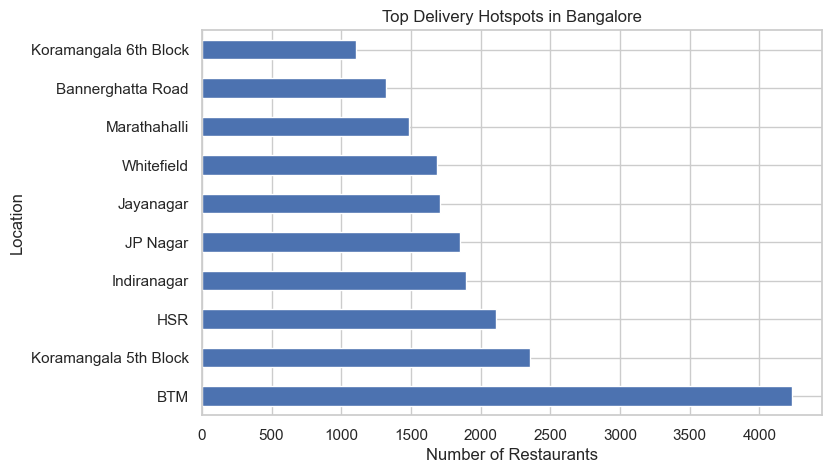

In [21]:
# If you have location data like 'location' or 'address', check it:
df['location'].value_counts().head(10).plot(kind='barh', figsize=(8,5))
plt.title('Top Delivery Hotspots in Bangalore')
plt.xlabel('Number of Restaurants')
plt.ylabel('Location')
plt.show()
